# Grafico dei punteggi negli esercizi

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
Cese = pd.read_pickle("data/da_usare/Cese_2003-2024_data.pickle")
Cese.head(2)

,anno,studente,posizione,regione,classe,es1,es2,es3,es4,es5,es6,tot,medaglia,anno_breve,pt123,pt456,zona,colore
0,2003,Tiozzo Giulio,1,Piemonte,5,7,7,7,6,7,7,41,ORO,03,21,20,Nord-Ovest,Gold
1,2003,Mantova Vincenzo,2,Lombardia,5,7,7,7,7,7,5,40,ORO,03,21,19,Nord-Ovest,Gold


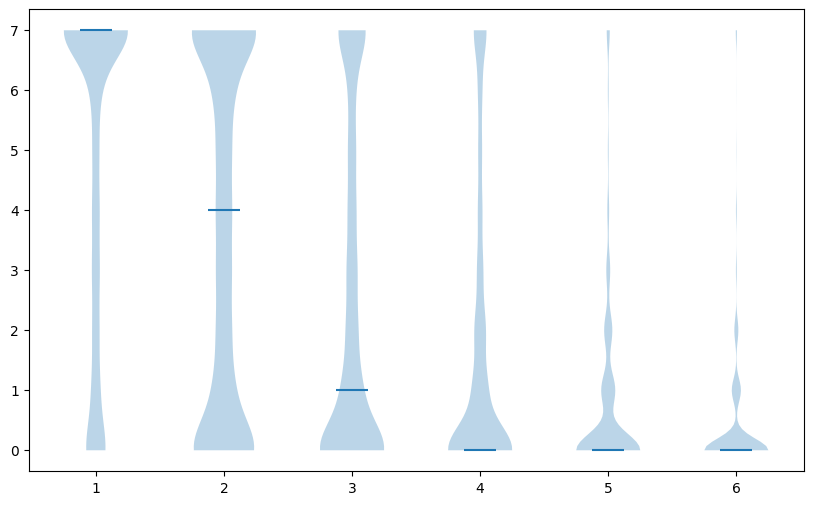

In [3]:


fig, ax = plt.subplots(figsize=(10, 6))

ax.violinplot(
    [ Cese["es1"], Cese["es2"], Cese["es3"], Cese["es4"], Cese["es5"], Cese["es6"] ],
    showmeans=False,
    showextrema=False,
    showmedians=True
);

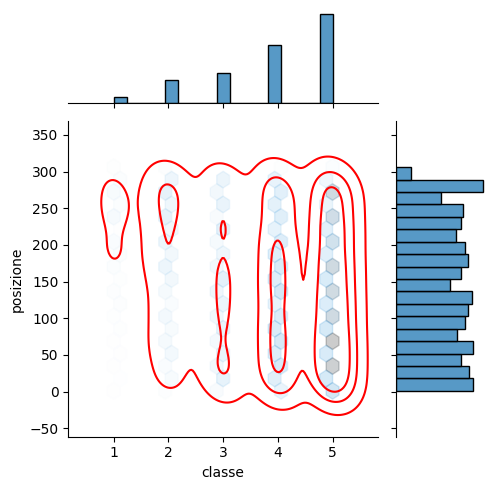

In [4]:
g = sns.jointplot(
    Cese[ Cese["classe"] > 0 ],
    x = "classe", y = "posizione",
    #hue="zona",
    #palette="hsv",
    kind="hex",
    height = 5, ratio = 3,
    alpha=0.2
)
cont = g.plot_joint(sns.kdeplot, color="Red", levels=4)

In [5]:
df = pd.DataFrame(columns=["classe", "posizione", "n"])
df

,classe,posizione,n


In [6]:
Cese.describe()

,anno,posizione,classe,es1,es2,es3,es4,es5,es6,tot,pt123,pt456
count,6584.000000,6584.000000,6584.000000,6584.000000,6584.000000,6584.000000,6584.000000,6584.000000,6584.000000,6584.000000,6584.000000,6584.000000
mean,2013.494684,144.002430,2.602825,4.796021,3.556349,2.403402,1.677248,0.824575,0.408414,13.666009,10.755772,2.910237
std,6.321766,85.238276,2.424255,2.750638,2.917913,2.743934,2.407112,1.592573,1.105877,8.486897,6.147601,3.763758
min,2003.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.000000,68.000000,-1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,6.000000,0.000000
50%,2013.000000,141.000000,4.000000,7.000000,4.000000,1.000000,0.000000,0.000000,0.000000,13.000000,11.000000,2.000000
75%,2019.000000,218.000000,5.000000,7.000000,7.000000,5.000000,3.000000,1.000000,0.000000,19.000000,15.000000,4.000000
max,2024.000000,306.000000,5.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,42.000000,21.000000,21.000000


In [7]:
index=0
for clas in range(1, 6):
    for pos in range(1, 307):
        num = len( Cese[ (Cese["classe"]==clas) & (Cese["posizione"]==pos) ] )
        df.at[index, "classe"] = clas
        df.at[index, "posizione"] = pos
        df.at[index, "n"] = num
        index = index + 1

In [8]:
df.head(15)

,classe,posizione,n
0,1,1,0
1,1,2,0
2,1,3,0
3,1,4,0
4,1,5,0
5,1,6,0
6,1,7,0
7,1,8,0
8,1,9,1
9,1,10,1


In [9]:
df = df[ df["n"] != 0 ]
df

,classe,posizione,n
8,1,9,1
9,1,10,1
12,1,13,1
32,1,33,1
40,1,41,1
...,...,...,...
1519,5,296,2
1520,5,297,2
1522,5,299,2
1524,5,301,1


In [10]:
df = df.reset_index(drop=True)
df

,classe,posizione,n
0,1,9,1
1,1,10,1
2,1,13,1
3,1,33,1
4,1,41,1
...,...,...,...
900,5,296,2
901,5,297,2
902,5,299,2
903,5,301,1


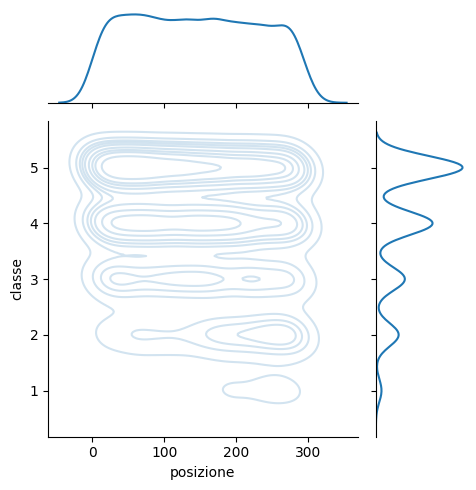

In [11]:
g = sns.jointplot(
    Cese[ Cese["classe"] > 0 ],
    x = "posizione", y = "classe",
    #hue="zona",
    #palette="hsv",
    kind="kde",
    height = 5, ratio = 3,
    alpha=0.2
)

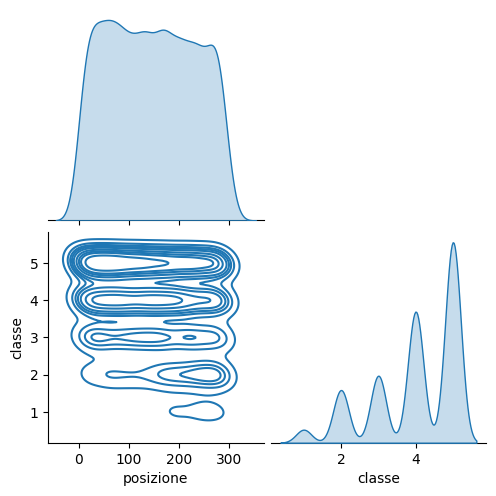

In [12]:
sns.pairplot(Cese[ Cese["classe"]!=-1][["posizione", "classe"]],
             #hue="zona", palette="hsv",
             kind="kde", corner=True)

In [13]:
db = Cese[ Cese["classe"]!=-1][["posizione", "classe"]]
db = db.rename(columns={"classe": "Classe", "posizione": "Posizione"})
db.head(2)

,Posizione,Classe
0,1,5
1,2,5


C:\Users\micbe\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)


Text(0.5, 1.2, 'Relazione tra classe e posizione in classifica')

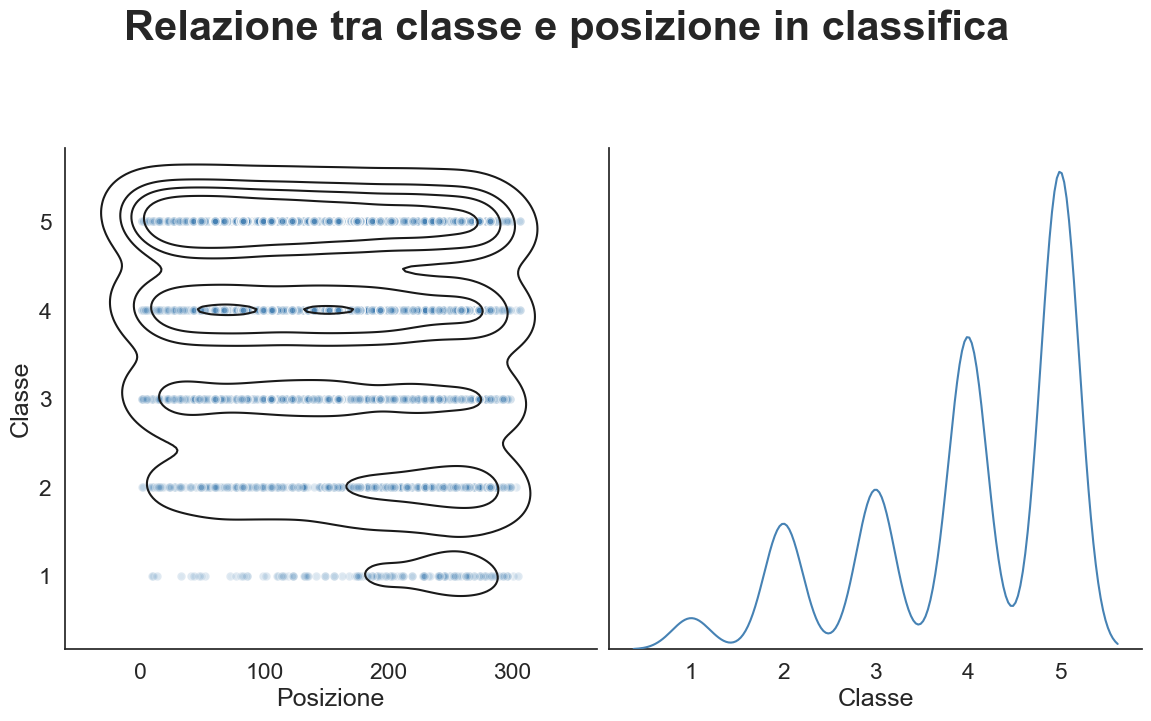

In [14]:
sns.set( style="white", font_scale=1.5 )

g = sns.pairplot(db,
                 x_vars=["Posizione", "Classe"], y_vars="Classe",
                 
                 plot_kws=dict(marker="o", linewidth=2, alpha=0.2, color="SteelBlue"),
                 diag_kws=dict(fill=False, color="SteelBlue"),
                 
                 height=6, aspect=1,
                 diag_kind="kde"
                )
g.map(sns.kdeplot, levels=5, color="k")
g.figure.suptitle("Relazione tra classe e posizione in classifica", y=1.2, fontsize=30, fontweight="bold")

In [15]:
g.figure.axes

[<Axes: xlabel='Posizione', ylabel='Classe'>,
 <Axes: xlabel='Classe', ylabel='Classe'>,
 <Axes: xlabel='Classe', ylabel='Density'>]

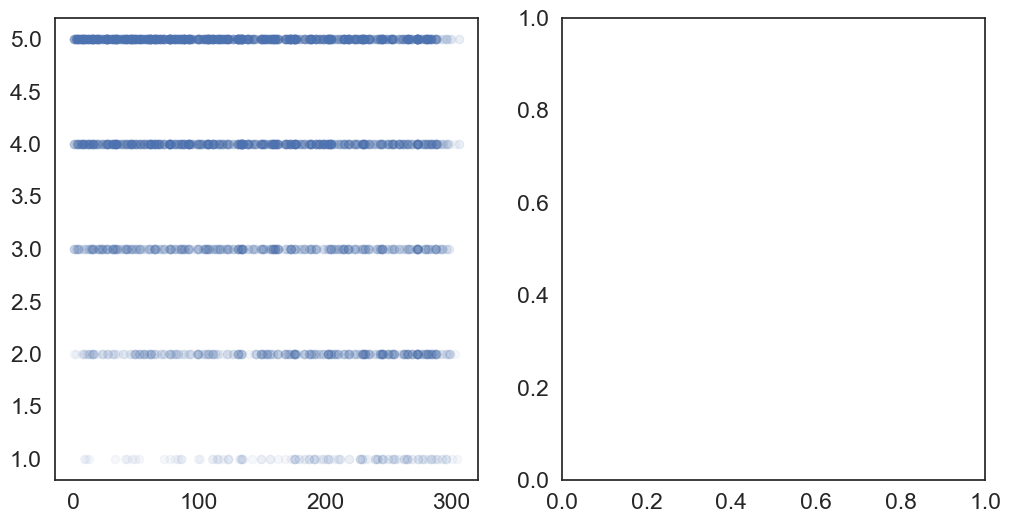

In [16]:
sns.set( style="white", font_scale=1.5 )

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax1.scatter(
    db["Posizione"], db["Classe"],

    alpha=0.05
);

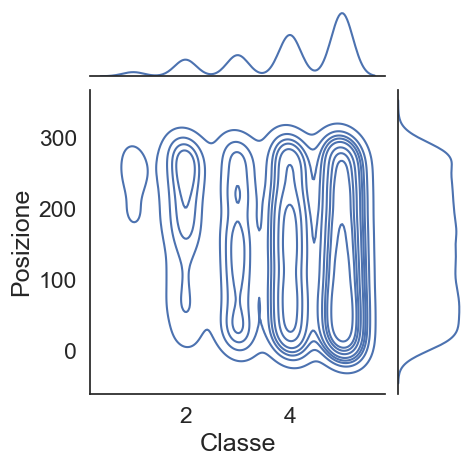

In [17]:
g = sns.jointplot(
    db,
    y = "Posizione", x = "Classe",
    #hue="zona",
    #palette="hsv",
    kind="kde",
    height = 5, ratio = 4,
    alpha=1
)

In [18]:
g.figure.get_axes()[2]

<Axes: xlabel='Density', ylabel='Posizione'>

In [19]:
g.figure.delaxes(g.figure.get_axes()[2])

In [20]:
g.figure.axes

[<Axes: xlabel='Classe', ylabel='Posizione'>,
 <Axes: xlabel='Classe', ylabel='Density'>]

In [21]:
db["Posizione_grafico"] = 301 - db["Posizione"]

In [22]:
def format(value, tick_number):
    n = value
    if n == 300:
        return "1"
    else:
        return str( int(300 - n) )

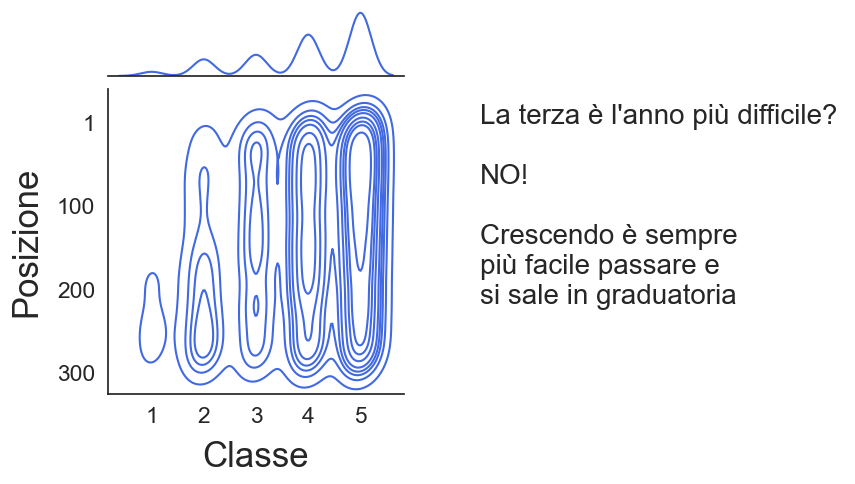

In [23]:
sfondo = "White"
linee = "#4169E1"

g = sns.jointplot(
    db,
    y = "Posizione_grafico", x = "Classe",
    kind="kde",
    height = 5, ratio = 4,
    color=linee,
    alpha=1
)

g.figure.delaxes(g.figure.get_axes()[2])

ax1 = g.figure.get_axes()[0]
ax2 = g.figure.get_axes()[1]

ax1.set_xlabel("Classe", labelpad=10, fontsize=25)
ax1.set_ylabel("Posizione", labelpad=10, fontsize=25)

ax1.yaxis.set_major_locator(plt.MultipleLocator(100))
ax1.yaxis.set_major_formatter(plt.FuncFormatter(format))

ax1.xaxis.set_major_locator(plt.MultipleLocator(1))

ax1.set_ylim([-25, 340])

g.figure.text(
    0.4, 0.3, "La terza è l'anno più difficile?\n\nNO!\n\nCrescendo è sempre\npiù facile passare e\nsi sale in graduatoria", fontsize=20,
    transform=fig.transFigure, ha="left")

ax1.set_facecolor(sfondo)
ax2.set_facecolor(sfondo)
g.figure.set_facecolor(sfondo);

# Salvataggio figura
plt.savefig("image/ClassePosizione.png", bbox_inches="tight", pad_inches=0.3, transparent=False)
plt.savefig("image/ClassePosizione.svg", bbox_inches="tight", pad_inches=0.3, transparent=False)